# KUKA iiwa7 LBR R800 

- please keep all files in common API folder of CoppeliaSim
-
- All angles are in `radian`
- 
- Run Setup cells first (try to run all from first)

## Setup

Robot joint range (+-):  <class 'sympy.sets.fancysets.Range'>
[[ 0.00  0.00  0.00]
 [ 0.00  0.00  340.00]
 [ 0.00  0.00  340.00]
 [ 86.92  86.92 -40.64]
 [ 86.92  86.92 -40.64]
 [ 200.00  200.00  326.00]
 [ 200.00  200.00  326.00]
 [ 200.00  200.00  200.00]]


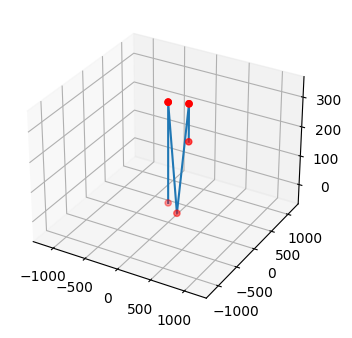

Matrix([[0], [0], [0], [0], [0], [0], [0]]) 



array([[-1.57,  340.00,  0.00,  0.00],
       [ 1.57,  0.00,  0.00,  0.00],
       [ 1.57,  400.00,  0.00,  0.00],
       [-1.57,  0.00,  0.00,  0.00],
       [-1.57,  400.00,  0.00,  0.00],
       [ 1.57,  0.00,  0.00,  0.00],
       [ 0.00,  126.00,  0.00,  0.00]])

In [1]:
"""
Dependencies:
1. Math_utils.py file consists of definations related basic vector & matrix manipulation, Homogeneous Transformation & 3D plots
2. iiwa7_Kinematics.py file consists of definations related to Kuka LBR iiwa7 R800's DH parameters, Homogeneous Transformation, Jacobian, Forward & Inverse Kinematics


Python libraries:
>> pip install sympy, scipy
"""

from Math_utils import *
from iiwa7_Kinematics import *

from time import sleep
import numpy as np
from sympy import *

DH = update_DH()
DH

In [11]:
"""
This cells contains some function to connect coppeliasim api, joint variable initialization & operation
"""

import sim
import time
import sys

import numpy as np

def connect_Client():
    sim.simxFinish(-1)
    clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)         # port-19999

    return clientID

# Now try to retrieve data in a blocking fashion (i.e. a service call):

def Nos_object(clientID = connect_Client()):
    res,objs=sim.simxGetObjects(clientID,sim.sim_handle_all,sim.simx_opmode_blocking)
    if res==sim.simx_return_ok:
        print ('\nNumber of objects in the scene: ',len(objs))
    else:
        print ('\nRemote API function call returned with error code: ',res)
    return len(objs)

# setup control variable

Joints = ['/LBRiiwa7R800/joint',
         '/LBRiiwa7R800/link2_resp/joint',
         '/LBRiiwa7R800/link3_resp/joint', 
         '/LBRiiwa7R800/link4_resp/joint',
         '/LBRiiwa7R800/link5_resp/joint',
         '/LBRiiwa7R800/link6_resp/joint',
         '/LBRiiwa7R800/link7_resp/joint'
         ]


def init_Joint_var(Joints = [], clientID = connect_Client()):
    Joint_Var = []

    for joint in Joints:
        try: err, var = sim.simxGetObjectHandle(clientID, joint, sim.simx_opmode_oneshot_wait)
        except: pass

        if err: print("Failed for Joint", joint, [err, var])
        else: 
            Joint_Var.append(var)
            print("Added for Joint", joint)
    
    print(Joint_Var)

    return Joint_Var

def Get_Joint_Angles(Joints):
    Pos = []
    for Joint in Joint_Var:
        err, pos = sim.simxGetJointPosition(clientID, Joint, sim.simx_opmode_oneshot_wait)
        if err:
            print("Failed for Joint", Joint)
            Pos.append(None)
        else: Pos.append(pos)
    return Pos
            
def Get_Joint_Force(Joints):
    Pos, Max = [], []
    for Joint in Joint_Var:
        err, max = sim.simxGetJointMaxForce(clientID, Joint, sim.simx_opmode_oneshot_wait)
        err, pos = sim.simxGetJointForce(clientID, Joint, sim.simx_opmode_oneshot_wait)
        if err:
            print("Failed for Joint", Joint)
            Pos.append(None)
            Max.append(None)
        else: 
            Pos.append(pos)
            Max.append(max)
    return Pos, Max

def move_robot(q = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]), Vel = 0.01):
    for i in range(len(Joint_Var)):
        Joint = Joint_Var[i]
        
        err_v = sim.simxSetJointTargetVelocity(clientID, Joint, Vel, sim.simx_opmode_streaming)
        err_p = sim.simxSetJointTargetPosition(clientID, Joint, q[i], sim.simx_opmode_streaming)



clientID = connect_Client()
Joint_Var = init_Joint_var(Joints)

if ~clientID:
    print(clientID, Nos_object())

Get_Joint_Angles(Joints)

Added for Joint /LBRiiwa7R800/joint
Added for Joint /LBRiiwa7R800/link2_resp/joint
Added for Joint /LBRiiwa7R800/link3_resp/joint
Added for Joint /LBRiiwa7R800/link4_resp/joint
Added for Joint /LBRiiwa7R800/link5_resp/joint
Added for Joint /LBRiiwa7R800/link6_resp/joint
Added for Joint /LBRiiwa7R800/link7_resp/joint
[17, 20, 23, 26, 29, 32, 35]

Number of objects in the scene:  80
0 80


[-0.943694531917572,
 0.9092164635658264,
 1.7697179317474365,
 -0.8644571900367737,
 0.8539028763771057,
 0.8317896127700806,
 7.798899304134466e-10]

In [12]:
Joint = Joint_Var[0]

angles = np.linspace(-np.pi, np.pi, 100)
for angle in angles:
    err_p = sim.simxSetJointTargetPosition(clientID, Joint, angle, sim.simx_opmode_oneshot_wait)
    sleep(0.1)


In [13]:
q_f

array([ 0.79,  2.83,  0.00,  2.42, -0.00,  2.73, -2.36])

In [14]:
q_start = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

for q in [q_start, q_f]:
    move_robot(q)
    
q_prev = Get_Joint_Angles(Joints)

print("\nPrevious Joint Angles:")
pprint(Matrix(q_prev))

print("\nPrevious Joint Position: ")
pprint(FK_Pos(q_prev))


Previous Joint Angles:
⎡  2.96705937385559  ⎤
⎢                    ⎥
⎢ 0.0835074260830879 ⎥
⎢                    ⎥
⎢-3.88557709811721e-5⎥
⎢                    ⎥
⎢  0.33614581823349  ⎥
⎢                    ⎥
⎢-1.15671332423517e-6⎥
⎢                    ⎥
⎢ 0.802821934223175  ⎥
⎢                    ⎥
⎣ -0.963435649871826 ⎦

Previous Joint Position: 
⎡ 0.72956761554201 ⎤
⎢                  ⎥
⎢-0.131505287776184⎥
⎢                  ⎥
⎢ 1233.31463298626 ⎥
⎢                  ⎥
⎣       1.0        ⎦


## Trajectory

### Circle

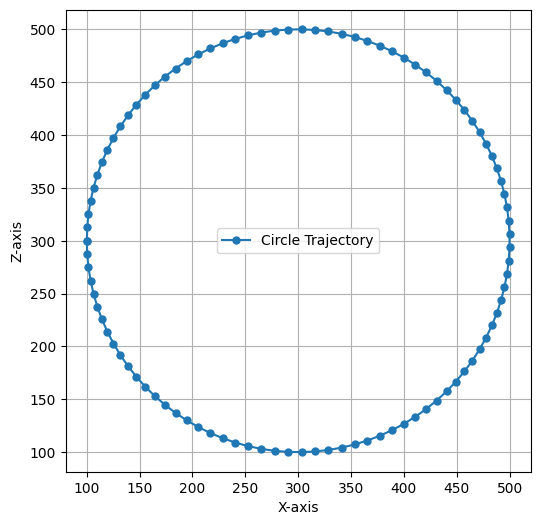

100

In [64]:
# Trajectory points generation

radius = 200  # Radius of the circle
num_points = 100  # Number of points to generate
center = [300, 300]  # Center of the circle
z = 500

# Generate points on the circle
theta = np.linspace(-np.pi, np.pi, num_points)
x = center[0] + radius * np.cos(theta)
y = center[1] + radius * np.sin(theta)
z = z * np.ones(num_points)
Trajectory_circle = np.array([x, z, y]).T
#print(Trajectory_circle)

# Plot the circle trajectory
plt.figure(figsize=(6, 6))
plt.plot(x, y, label='Circle Trajectory', marker='o', markersize=5)
plt.grid(True)

plt.xlabel('X-axis') 
plt.ylabel('Z-axis') 

plt.axis('equal')  # Equal aspect ratio
plt.legend()
plt.show()

len(Trajectory_circle)

In [15]:
# Getting joint angles by the Inverse Kinematics over all Cartesian Trajectory points

EE_orientation = np.array([[0, 1, 0]]).T

q_start = -Joint_range #np.array([, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

q_circle = [q_start]
for Pos in Trajectory_circle:
  pos = np.array([Pos]).T
  orientation = pos - np.array([[0, 0, 340]]).T
  q_circle.append(IK(pos, EE_orientation, q_circle[-1], visualize = False))

q_circle[0:10]

[array([-2.97, -2.09, -2.97, -2.09, -2.97, -2.09, -3.05]),
 array([-1.83, -0.61,  3.14, -2.13, -0.28, -1.18, -1.46]),
 array([-1.83, -0.65,  3.14, -2.12, -0.28, -1.21, -1.47]),
 array([-1.84, -0.68,  3.14, -2.11, -0.28, -1.24, -1.48]),
 array([-1.84, -0.72,  3.14, -2.11, -0.28, -1.26, -1.48]),
 array([-1.85, -0.75,  3.14, -2.10, -0.29, -1.29, -1.49]),
 array([-1.86, -0.78,  3.14, -2.09, -0.30, -1.31, -1.49]),
 array([-1.87, -0.82,  3.14, -2.07, -0.31, -1.33, -1.50]),
 array([-1.88, -0.85,  3.14, -2.06, -0.32, -1.35, -1.50]),
 array([-1.89, -0.88,  3.14, -2.04, -0.33, -1.37, -1.50])]

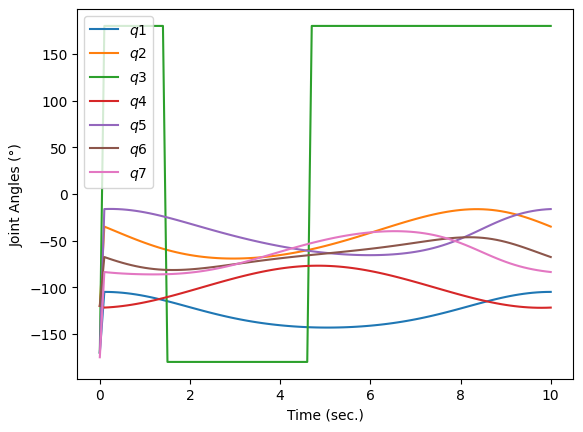

In [63]:
time = np.linspace(0, 10, num_points+1)

for i in [0, 1, 2, 3, 4, 5, 6]: #
  #i=0
  q_pos = np.array(q_circle).T[i]*180/np.pi
  q_vel = np.array(q_circle).T[i]

  plt.plot(time, q_pos, label='$q{i}$'.format(i=i+1))
  #plt.plot(time, q_vel, label='$q{i}$'.format(i=i+1))

#plt.plot(time, w_instances)

plt.xlabel('Time (sec.)') 
plt.ylabel('Joint Angles (°)') 

plt.legend(loc='best')
plt.show()

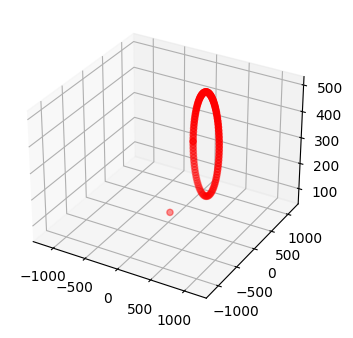

In [16]:
# Trajectory point verification by Forward Kinematics in 3D Workspace

points = []
for q in q_circle:
  DH = update_DH(q, show=False)
  Hi, Hx, Oi = Homo_Mat(DH)
  points.append(Oi[7])

plot_3D(points, False)

In [70]:
w_instances = []
for q in q_circle:
  J = Jacobian(DH, q)[0]
  Jv = J[0:3]

  w = np.sqrt(abs(np.linalg.det(Jv @ Jv.T)))
  w_instances.append(w)

w_instances[9]

0.47596912553673265

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


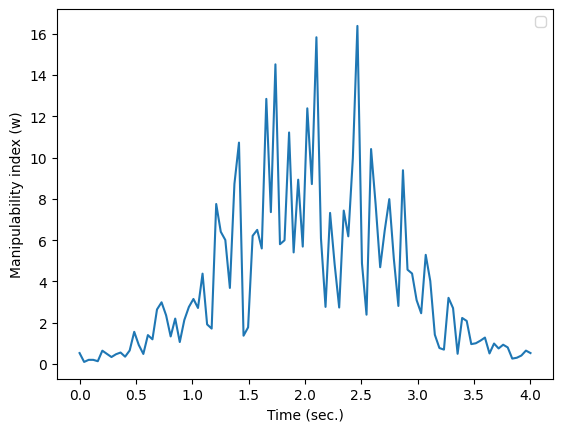

In [72]:
time = np.array(t_instances)
plt.plot(time, w_instances[1:])

plt.xlabel('Time (sec.)') 
plt.ylabel('Manipulability index (w)') 

plt.legend(loc='best')
plt.show()

In [106]:
for q in q_circle:
    move_robot(q)
    sleep(0.5)

### Spiral

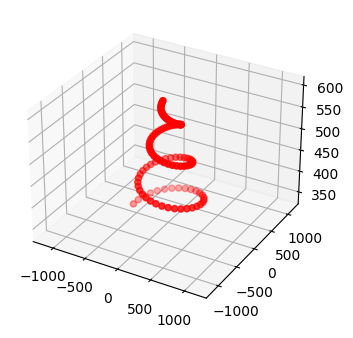

array([[[-549.78],
        [ 0.00],
        [ 340.00]],

       [[-535.17],
        [ 103.15],
        [ 342.63]],

       [[-501.56],
        [ 200.79],
        [ 345.25]]])

In [53]:
# Parameters
b = 25  # Constant that determines the gap between the spiral's coils
num_points = 100  # Number of points to generate
alpha = np.linspace(7* np.pi, np.pi, num_points)  # Angle values from 0 to 10π
h = np.linspace(340, 600, num_points) # height from 340 to 600

r = b * alpha
x = r * np.cos(alpha)
y = r * np.sin(alpha)
z = h
Trajectory_spiral = np.array([[x, y, z]]).T

plot_3D(Trajectory_spiral, False)
Trajectory_spiral[0:3]

In [54]:
# Getting joint angles by the Inverse Kinematics over all Cartesian Trajectory points

EE_orientation = np.array([[0, 1, 0]]).T

q_start = -Joint_range #np.array([, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

q_spiral = [q_start]
for Pos in Trajectory_spiral:
  pos = np.array(Pos)
  orientation = pos - np.array([[0, 0, 340]]).T
  q_spiral.append(IK(pos, EE_orientation, q_spiral[-1], visualize = False))

q_spiral[0:10]

[array([-2.97, -2.09, -2.97, -2.09, -2.97, -2.09, -3.05]),
 array([ 0.23, -0.78,  3.14, -1.58,  1.73, -1.73, -2.34]),
 array([ 0.04, -0.73,  3.14, -1.67,  1.60, -1.60, -2.31]),
 array([-0.15, -0.68,  3.14, -1.77,  1.46, -1.48, -2.26]),
 array([-0.35, -0.63,  3.14, -1.86,  1.29, -1.36, -2.20]),
 array([-0.56, -0.58,  3.14, -1.94,  1.10, -1.26, -2.12]),
 array([-0.78, -0.54,  3.14, -2.01,  0.88, -1.16, -2.02]),
 array([-1.01, -0.50,  3.14, -2.06,  0.64, -1.09, -1.90]),
 array([-1.26, -0.47,  3.14, -2.11,  0.37, -1.04, -1.76]),
 array([-1.51, -0.45,  3.14, -2.13,  0.07, -1.01, -1.61])]

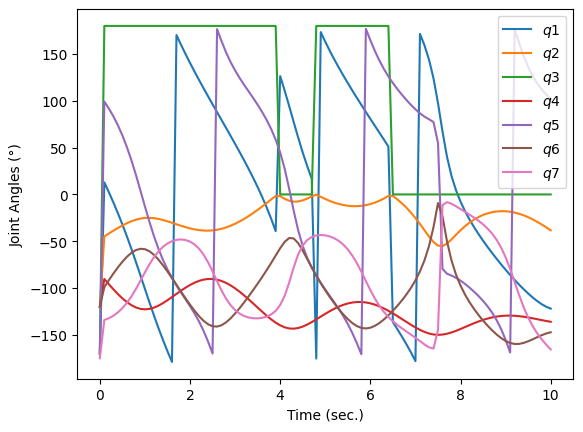

In [62]:
time = np.linspace(0, 10, num_points+1)

for i in [0, 1, 2, 3, 4, 5, 6]: #
  #i=0
  q_pos = np.array(q_spiral).T[i]*180/np.pi
  q_vel = np.array(q_spiral).T[i]

  plt.plot(time, q_pos, label='$q{i}$'.format(i=i+1))
  #plt.plot(time, q_vel, label='$q{i}$'.format(i=i+1))

#plt.plot(time, w_instances)

plt.xlabel('Time (sec.)') 
plt.ylabel('Joint Angles (°)') 
plt.legend(loc='best')
plt.show()

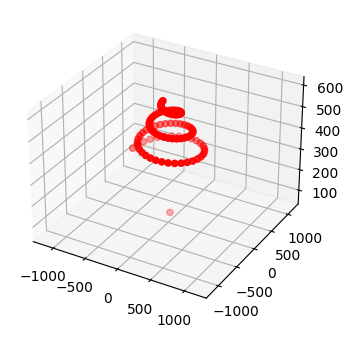

In [57]:
# Trajectory point verification by Forward Kinematics in 3D Workspace

points = []
for q in q_spiral:
  DH = update_DH(q, show=False)
  Hi, Hx, Oi = Homo_Mat(DH)
  points.append(Oi[7])

plot_3D(points, False)

In [73]:
w_instances = []
for q in q_spiral:
  J = Jacobian(DH, q)[0]
  Jv = J[0:3]

  w = np.sqrt(abs(np.linalg.det(Jv @ Jv.T)))
  w_instances.append(w)

w_instances[9]

0.03385505715377331

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


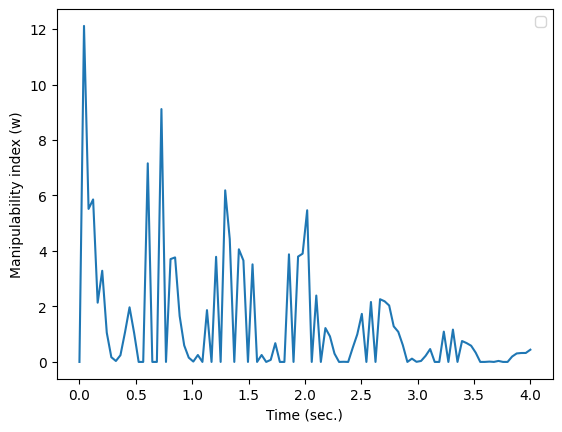

In [74]:
time = np.array(t_instances)
plt.plot(time, w_instances[1:])

plt.xlabel('Time (sec.)') 
plt.ylabel('Manipulability index (w)') 

plt.legend(loc='best')
plt.show()

In [60]:
for q in q_spiral:
    move_robot(q)
    sleep(0.1)

### Simple cubic polynomial

In [15]:
#move_robot(q_prev)      

q_prev = Get_Joint_Angles(Joints)
print(q_prev)

FK_Pos(q_prev)      # 

[0.7850774526596069, 2.094395160675049, -1.7760019545676187e-05, 2.0940935611724854, -0.00010526682308409363, 2.094527244567871, -2.356194496154785]


Matrix([
[322.280946440536],
[ 322.06675463472],
[476.952638130079],
[             1.0]])

In [16]:
Pos = np.array([[400, 600, 500]]).T
EE_orientation = Pos - np.array([[0, 0, 340]]).T

#q_prev = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

q_f = IK(Pos, EE_orientation, q_prev, visualize = False)

q_prev, q_f

([0.7850774526596069,
  2.094395160675049,
  -1.7760019545676187e-05,
  2.0940935611724854,
  -0.00010526682308409363,
  2.094527244567871,
  -2.356194496154785],
 array([ 0.98,  2.05,  0.00,  1.40,  0.00,  0.70, -0.98]))

In [17]:
# Simple Cubic Polynomial - variables & calculation

t_f = 4    # Required time to complete motion

a0 = q_start
a1 = 0
a2 = (q_f - q) * 3/(t_f**2)
a3 = - (q_f - q) * 2/(t_f**3)

def q_t(t = 0):
  return a0 + a1*t + a2*t**2 + a3*t**3

def q_dot_t(t = 0):
  return a1 + 2*a2*t + 3*a3*t**2

q_t(t = 2), q_dot_t(t = 2)

(array([ 0.20, -0.29,  0.10, -0.41,  0.10, -0.92,  0.79]),
 array([ 0.07, -0.29, -0.00, -0.38,  0.00, -0.76,  0.52]))

In [18]:
# Time, Joint angle & Joint Velocity instances calculation from Simple Cubic Polynomial Function

t_instances = np.linspace(0, t_f, 100)
q_instances, q_dot_instances = [], []
for t in t_instances:
  q_instances.append(q_t(t))
  q_dot_instances.append(q_dot_t(t))

q_instances = np.array(q_instances)
q_dot_instances = np.array(q_dot_instances)
len(t_instances), #q_instances, q_dot_instances

(100,)

In [19]:
# Manipulability Index (w = sqrt[Determinant(J @ J.T)])

w_instances = []
J_instances = []
for q in q_instances:
  J = Jacobian(DH, q)[0]
  J_instances.append(J)
  Jv = J[0:3]

  w = np.sqrt(abs(np.linalg.det(Jv @ Jv.T)))
  w_instances.append(w)

w_zero_count = 0
for w in w_instances:
  if w==0: w_zero_count+=1 
w_zero_count

[array([[ 0.00],
       [ 0.00],
       [ 1.00],
       [ 1.00]]), array([[-0.00],
       [ 0.00],
       [ 1.00],
       [ 0.00]]), array([[ 0.05],
       [ 0.01],
       [ 1.00],
       [ 0.00]]), array([[ 0.21],
       [-0.65],
       [ 0.73],
       [ 0.00]]), array([[ 0.23],
       [-0.37],
       [ 0.90],
       [ 0.00]]), array([[-0.01],
       [ 0.65],
       [ 0.76],
       [ 0.00]]), array([[-0.08],
       [ 0.45],
       [ 0.89],
       [ 0.00]]), array([[-0.11],
       [ 0.29],
       [ 0.95],
       [ 0.00]])]


[array([[ 0.00],
       [ 0.00],
       [ 1.00],
       [ 1.00]]), array([[-0.00],
       [ 0.00],
       [ 1.00],
       [ 0.00]]), array([[ 0.05],
       [ 0.01],
       [ 1.00],
       [ 0.00]]), array([[ 0.21],
       [-0.65],
       [ 0.73],
       [ 0.00]]), array([[ 0.23],
       [-0.37],
       [ 0.90],
       [ 0.00]]), array([[-0.01],
       [ 0.65],
       [ 0.76],
       [ 0.00]]), array([[-0.08],
       [ 0.45],
       [ 0.89],
       [ 0.00]]), array([[-0.11],
       [ 0.29],
       [ 0.95],
       [ 0.00]])]
[array([[ 0.00],
       [ 0.00],
       [ 1.00],
       [ 1.00]]), array([[-0.00],
       [ 0.00],
       [ 1.00],
       [ 0.00]]), array([[ 0.05],
       [ 0.01],
       [ 1.00],
       [ 0.00]]), array([[ 0.21],
       [-0.65],
       [ 0.73],
       [ 0.00]]), array([[ 0.23],
       [-0.37],
       [ 0.90],
       [ 0.00]]), array([[-0.01],
       [ 0.65],
       [ 0.76],
       [ 0.00]]), array([[-0.08],
       [ 0.45],
       [ 0.89],
       [ 0.00]]), array([[

36

In [20]:
# Consider 
len(J_instances), J_instances[-1]

(100,
 array([[ 72.80,  75.68, -29.92, -769.94, -435.88,  627.66,  145.72],
        [-269.83, -268.94,  72.38, -9.44, -236.56,  67.86,  978.21],
        [ 0.00,  0.82, -2.73, -203.39, -131.57,  170.08,  107.86],
        [ 0.00, -0.00, -0.32, -0.15,  0.00, -0.27, -0.98],
        [ 0.00,  0.00, -0.10, -0.79, -0.49,  0.56,  0.13],
        [ 1.00,  1.00,  0.94,  0.59,  0.87,  0.78,  0.11]]))

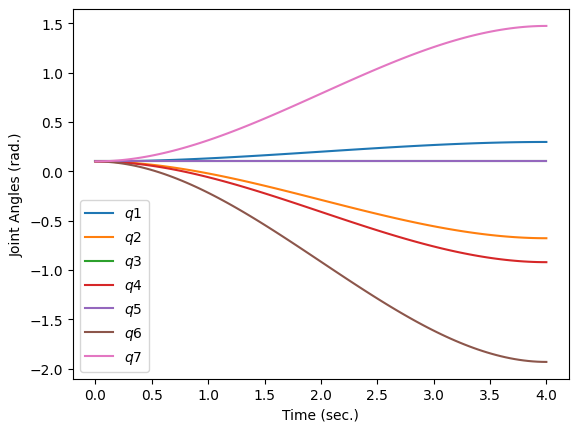

In [21]:
# Joint Angle Visualization, derived using Simple Cubic Polynomial 

time = np.array(t_instances)

for i in range(7):
  q_pos = np.array(q_instances.T[i])
  q_vel = np.array(q_dot_instances.T[i])

  plt.plot(time, q_pos, label='$q{i}$'.format(i=i+1))
  #plt.plot(time, q_vel, label='$q{i}$'.format(i=i+1))

#plt.plot(time, w_instances)

plt.xlabel('Time (sec.)') 
plt.ylabel('Joint Angles (rad.)') 

plt.legend(loc='best')
plt.show()

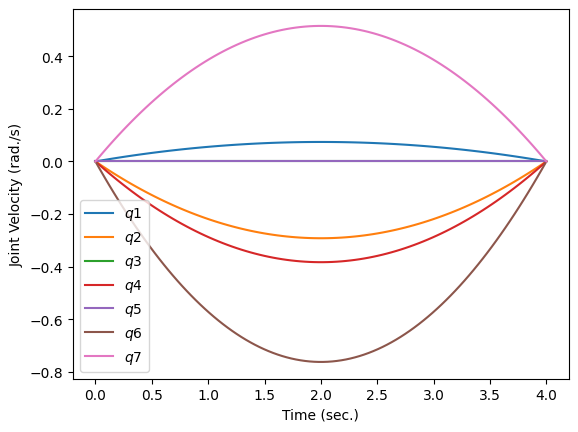

In [22]:
# Joint Velocity Visualization, derived using Simple Cubic Polynomial 

time = np.array(t_instances)

for i in range(7):
  q_pos = np.array(q_instances.T[i])
  q_vel = np.array(q_dot_instances.T[i])

  plt.plot(time, q_vel, label='$q{i}$'.format(i=i+1))

#plt.plot(time, w_instances)

plt.xlabel('Time (sec.)') 
plt.ylabel('Joint Velocity (rad./s)') 

plt.legend(loc='best')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


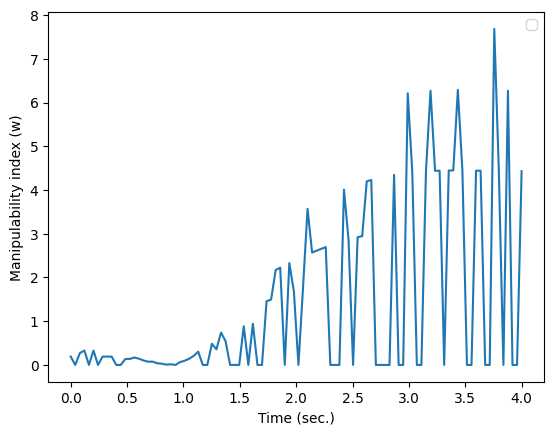

In [23]:
# Manipulability Index Visualization

time = np.array(t_instances)
plt.plot(time, w_instances)

plt.xlabel('Time (sec.)') 
plt.ylabel('Manipulability index (w)') 

plt.legend(loc='best')
plt.show()

In [24]:
# Coppelia Simulation control for derived Joint angles and velocities

import time

c = 0
t0 = time.time()

for k in range(len(t_instances)):
    
    try:
        dt = t_instances[k+1] - t_instances[k]
    except: break
    t, q, q_dot = t_instances[k], q_instances[k], q_dot_instances[k]
    #print(t, q, q_dot)

    for i in range(len(Joint_Var)):
        Joint = Joint_Var[i]
        err_p = sim.simxSetJointTargetPosition(clientID, Joint, q[i], sim.simx_opmode_streaming)
        err_v = sim.simxSetJointTargetVelocity(clientID, Joint, q_dot[i], sim.simx_opmode_streaming)
        if err_p or err_v: print(err_p, err_p, k, i)    

    #time.sleep(dt)  # Use non-blocking delay

    while (time.time()-t0) < t: c += 1



In [26]:
J = J_instances[5] 
Jv = J[0:3]

w = np.sqrt(abs(np.linalg.det(Jv @ Jv.T)))
w, Jv

(0.32887631660937683,
 array([[-2.28,  1.41,  5.57, -825.82, -470.73,  820.28,  560.96],
        [ 49.33,  49.71, -9.57, -221.00, -243.39,  59.22,  159.06],
        [ 0.00, -0.15, -0.20,  32.64,  18.82, -32.13, -22.18]]))

# Analysis

All analysis done for `Linier Trajectory made by Simple cubic polynomial`

## SVD Analysis

In [29]:
from scipy.linalg import svd

In [30]:
U_instances = []
E_dia_instances = []
V_instances = []

for i in range(len(J_instances)):
    Jv = np.array(J_instances[i][0:3], dtype=float)
    print(Jv)
    U, E_dia, V = svd(Jv)

    U_instances.append(U)
    E_dia_instances.append(E_dia)
    V_instances.append(V)

E_dia_instances

[[-2.51  1.18  5.62 -825.34 -470.78  819.42  563.58]
 [ 52.54  52.91 -9.99 -222.68 -242.93  58.28  149.40]
 [ 0.00 -0.15 -0.21  34.76  20.06 -34.19 -23.73]]
[[-2.50  1.19  5.61 -825.36 -470.78  819.46  563.47]
 [ 52.40  52.77 -9.97 -222.61 -242.95  58.31  149.80]
 [ 0.00 -0.15 -0.21  34.68  20.01 -34.11 -23.67]]
[[-2.48  1.22  5.61 -825.42 -470.78  819.56  563.15]
 [ 52.01  52.38 -9.92 -222.41 -243.01  58.43  150.98]
 [ 0.00 -0.15 -0.21  34.42  19.86 -33.85 -23.48]]
[[-2.43  1.27  5.60 -825.52 -470.77  819.74  562.62]
 [ 51.37  51.74 -9.84 -222.07 -243.10  58.62  152.93]
 [ 0.00 -0.15 -0.21  33.99  19.61 -33.44 -23.17]]
[[-2.37  1.33  5.59 -825.65 -470.75  819.98  561.89]
 [ 50.47  50.84 -9.72 -221.60 -243.23  58.88  155.63]
 [ 0.00 -0.15 -0.20  33.39  19.26 -32.86 -22.73]]
[[-2.28  1.41  5.57 -825.82 -470.73  820.28  560.96]
 [ 49.33  49.71 -9.57 -221.00 -243.39  59.22  159.06]
 [ 0.00 -0.15 -0.20  32.64  18.82 -32.13 -22.18]]
[[-2.18  1.51  5.55 -826.01 -470.71  820.64  559.82]
 [ 47

[array([ 1412.49,  200.35,  0.00]),
 array([ 1412.50,  200.30,  0.00]),
 array([ 1412.55,  200.16,  0.00]),
 array([ 1412.63,  199.95,  0.00]),
 array([ 1412.73,  199.70,  0.00]),
 array([ 1412.86,  199.44,  0.00]),
 array([ 1413.02,  199.22,  0.00]),
 array([ 1413.19,  199.09,  0.00]),
 array([ 1413.37,  199.12,  0.00]),
 array([ 1413.57,  199.36,  0.00]),
 array([ 1413.77,  199.89,  0.00]),
 array([ 1413.97,  200.78,  0.00]),
 array([ 1414.16,  202.12,  0.00]),
 array([ 1414.35,  203.96,  0.00]),
 array([ 1414.51,  206.39,  0.00]),
 array([ 1414.66,  209.46,  0.00]),
 array([ 1414.77,  213.23,  0.00]),
 array([ 1414.86,  217.76,  0.00]),
 array([ 1414.90,  223.07,  0.00]),
 array([ 1414.89,  229.18,  0.00]),
 array([ 1414.84,  236.12,  0.00]),
 array([ 1414.72,  243.87,  0.00]),
 array([ 1414.54,  252.43,  0.00]),
 array([ 1414.30,  261.77,  0.00]),
 array([ 1413.97,  271.88,  0.00]),
 array([ 1413.57,  282.71,  0.00]),
 array([ 1413.08,  294.22,  0.00]),
 array([ 1412.50,  306.38,  

In [58]:
np.diag(E_dia)

array([[ 677.68,  0.00,  0.00],
       [ 0.00,  374.34,  0.00],
       [ 0.00,  0.00,  0.00]])

In [49]:
U @ np.diag(E_dia) @ V.T

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 3)

In [66]:
eigenvalues, eigenvectors = np.linalg.eig(Jv)
eigenvalues, eigenvectors

LinAlgError: Last 2 dimensions of the array must be square

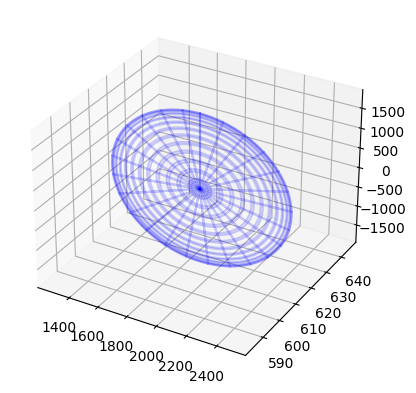

In [22]:
plot_ellipsoid(U, E_dia)

## Statics

In [32]:
J

Matrix([
[57.4701175226048,      1040.25751386812, 57.4701175226048,     -1040.25751386812, 57.4701175226048,      1040.25751386812, 57.4701175226048],
[-307.57126398879, -1.88333081976789e-14, -307.57126398879, -1.88333081976789e-14, -307.57126398879, -1.88333081976789e-14, -307.57126398879],
[               0,       307.57126398879,                0,      -307.57126398879,                0,       307.57126398879,                0]])

In [9]:
Tau, Max = Get_Joint_Force(Joints)

Tau_max = Matrix([Max]).T
Tau = Matrix([Tau]).T
Tau

Matrix([
[ -1.66589688888052e-5],
[     37.1700973510742],
[    0.307308167219162],
[    -2.79594993591309],
[-0.000207205710466951],
[     2.77979493141174],
[   -0.148839816451073]])

In [21]:
Force_arr = []

for i in range(len(q_instances)):
    q = q_instances[i]
    q_dot = q_dot_instances[i]

    J, Oi, Vel = Jacobian(
        q = q,
        q_dot = q_dot
    )

    J = Matrix(J[0:3])
    J_T_inv = (J * J.H) **-1 @ J

    Force = J_T_inv @ Tau
    Force_arr.append(Force)

Force_arr[0:5]

[Matrix([
 [  0.0104360720922024],
 [0.000753045225298128],
 [                   0]]),
 Matrix([
 [ 0.0208719932707027],
 [0.00140720501654974],
 [-4.8292384670634e-6]]),
 Matrix([
 [ 0.0208718423570006],
 [0.00141293973722937],
 [-4.8292384670634e-6]]),
 Matrix([
 [-7.54568510478656e-8],
 [ 0.00142263122653583],
 [ -2.4146192335317e-6]]),
 Matrix([
 [ -0.0417445901962137],
 [0.000784194756621325],
 [    -1.3358172278019]])]

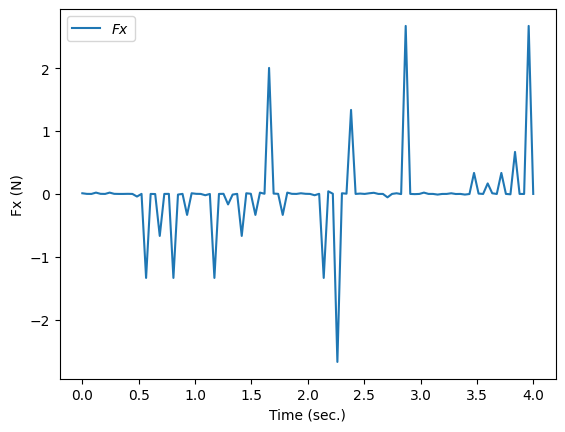

In [22]:
# Joint Angle Visualization, derived using Simple Cubic Polynomial 

time = np.array(t_instances)
Fx = np.array(Force_arr).reshape(3, len(t_instances))[0]

plt.plot(time, Fx, label='$Fx$'.format(i=i+1))

plt.xlabel('Time (sec.)') 
plt.ylabel('Fx (N)') 

plt.legend(loc='best')
plt.show()

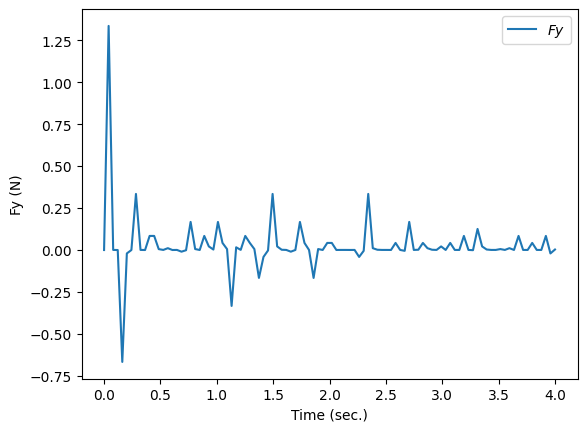

In [23]:
# Joint Angle Visualization, derived using Simple Cubic Polynomial 

time = np.array(t_instances)


Fy = np.array(Force_arr).reshape(3, len(t_instances))[1]

plt.plot(time, Fy, label='$Fy$'.format(i=i+1))

plt.xlabel('Time (sec.)') 
plt.ylabel('Fy (N)') 

plt.legend(loc='best')
plt.show()

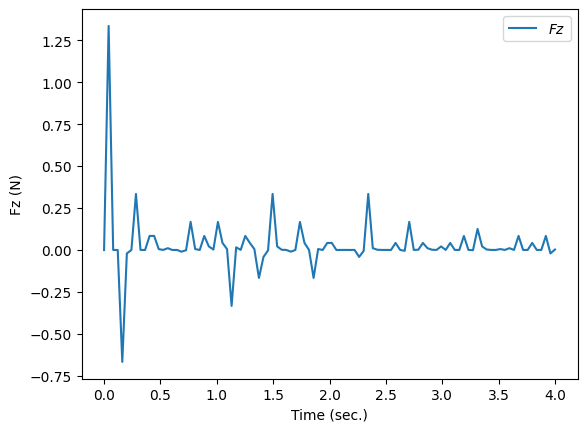

In [24]:
# Joint Angle Visualization, derived using Simple Cubic Polynomial 

time = np.array(t_instances)
Fz= np.array(Force_arr).reshape(3, len(t_instances))[1]

plt.plot(time, Fz, label='$Fz$'.format(i=i+1))

plt.xlabel('Time (sec.)') 
plt.ylabel('Fz (N)') 

plt.legend(loc='best')
plt.show()

## Stiffness Analysis

In [36]:
F_ext = np.array([0, 0, 0])        # Assume values

# Assumed Kq value, can be determined from VJM model
Kq = np.diag([1, 1, 1, 1, 1, 1, 1])
Kq

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]])

In [37]:
Kx_array = []

for i in range(len(q_instances)):
    q = q_instances[i]
    q_dot = q_dot_instances[i]

    J, Oi, Vel = Jacobian(
        q = q,
        q_dot = q_dot
    )

    J = Matrix(J[0:3])
    J_inv = J.H @ (J * J.H) **-1
    J_T_inv = (J * J.H) **-1 @ J

    Kx = J_T_inv @ Kq @ J_inv
    Kx_array.append(Kx)

Kx_array[0:5]

[Matrix([
 [1.78814843820874e-7,  2.0252457488823e-8, 2.91038304567337e-11],
 [9.07658659343724e-9, 9.05826323425174e-5,  2.90450770989992e-7],
 [                  0,                   0,                    0]]),
 Matrix([
 [ 7.15255737304688e-7,  6.70552253723145e-8,                    0],
 [ 4.15252543461975e-9,  9.10442440229531e-5, -2.91187461698428e-7],
 [1.16415321826935e-10, -5.82371285418049e-7,  1.86264514923096e-9]]),
 Matrix([
 [ 7.15259375283495e-7,  4.01428223995026e-9, 1.16415321826935e-10],
 [ 4.01428223995026e-9,  9.24318094490673e-5, -5.86798705626279e-7],
 [1.16415321826935e-10, -5.86798705626279e-7,  3.72529029846191e-9]]),
 Matrix([
 [                  0,   -9.285571422879e-9, 2.91038304567337e-11],
 [1.11758708953857e-8,  9.48026695279935e-5,  6.04904926149175e-8],
 [                  0, -2.97138285532128e-7, 9.31322574615479e-10]]),
 Matrix([
 [2.86108115687966e-6, 1.03196725831367e-7,  9.15536656975746e-5],
 [-7.5616299000103e-8, 9.82326614291651e-5, -1.209860784

In [45]:
# Stiffness Ellipsoid


# Ref